In [ ]:
using Plots
using HypothesisTests



include("distributions.jl")



generate_emp (generic function with 4 methods)

In [163]:
function kolmogorov(x::Vector{Float64}, y::Vector{Float64}, label::String)
    p_value = pvalue(ApproximateTwoSampleKSTest(x, y))
    θs = collect(0.0:0.01:1.0)
    return p_value.<θs
end


function kolmogorov(x::Vector{Float64}, y::Vector{Float64})
    d_obs = mean(abs.(sort(x) .- sort(y)))
    d_perm = zeros(80)
    total_atoms = vcat(x, y)
    for i in 1:80
        shuffled = shuffle(total_atoms)
        d_perm[i] = mean(abs.(sort(shuffled[1:length(x)]) .- sort(shuffled[length(x)+1:end])))
    end
    θs = collect(0.0:0.01:1.0)
    perm_thresholds = quantile(d_perm, 1 .- θs)
    return d_obs .> perm_thresholds
end


kolmogorov (generic function with 6 methods)

In [164]:
function kolmogorov(q_1_emp::emp_ppm, q_2_emp::emp_ppm, θs::Vector{Float64}, b)
    n = q_1_emp.n
    rejections = zeros(b,length(θs))
    for i in 1:b
        x = q_1_emp.atoms[rand(1:n), :]
        y = q_2_emp.atoms[rand(1:n), :]
        rejections[i,:] = kolmogorov(x, y, "x")
    end
    rej_rates = zeros(length(θs))
    for i in 1:length(θs)
        col = rejections[:, i]
        n_ones = sum(col .> 0)
        rej_rates[i] = n_ones / b
    end
    return rej_rates
end

kolmogorov (generic function with 6 methods)

In [165]:
function normal_normal_iid(μ_1::Float64, μ_2::Float64, σ::Float64, a::Float64, b::Float64, n::Int, m::Int, s::Int, θs::Vector{Float64})
    
    
    # μ_1 : mean of normal distribution from which we generate mean of inner normal distribution ---> Q^1
    # μ_2 : mean of normal distribution from which we generate mean of inner normal distribution ---> Q^2
 
    # random probability measures P_1,P_2 are normal distributions with mean generated from N(μ_1, σ) and N(μ_2, σ) respectively.

    
    # n :: Number of rows in hierarchical sample
    # m :: Number of columns in hierarchical sample
    # s :: Number of distances sampled
    # θs :: Vector of probability levels for thresholds
    println("Simulating normal-normal with n = $n, m = $m")

    q_normal_normal_1 = normal_normal(μ_1, σ, a, b)
    q_normal_normal_2 = normal_normal(μ_2, σ, a, b)

    

    rej_rates = zeros(s, length(θs))
    for i in 1:s
        println("Iteration $i")
        q_1_emp = generate_emp(q_normal_normal_1, n, m)
        q_2_emp = generate_emp(q_normal_normal_2, n, m)
        rej_rates[i, :] = kolmogorov(q_1_emp, q_2_emp, θs, 100)
    end
    return mean(rej_rates, dims = 1)
end



normal_normal_iid (generic function with 1 method)

In [176]:
μ_1 = 1.0
μ_2 = 1.0
σ = 1.0


a, b = 0.0, 1.0
n, m = 100, 7000
s = 100
θs = collect(0:0.01:1.0)
rej_rates = normal_normal_iid(μ_1 ,μ_2, σ, a, b, n, m, s, θs)

Simulating normal-normal with n = 100, m = 7000
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74

1×101 Matrix{Float64}:
 0.0  0.9027  0.9108  0.9162  0.9209  …  0.9981  0.9984  0.999  0.9995  1.0

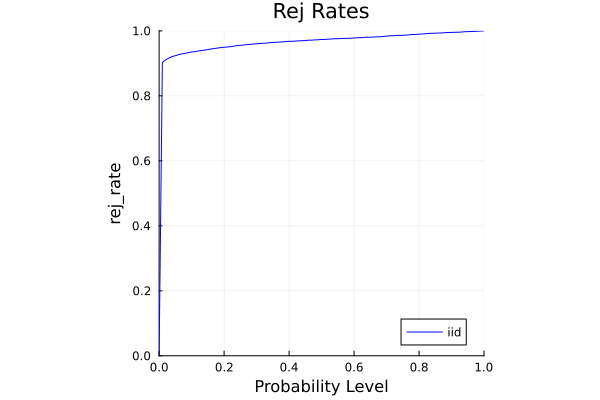

In [177]:
plot(θs,rej_rates[1,:], label="iid", xlabel="Probability Level", ylabel="rej_rate", title="Rej Rates", ratio = 1.0, xlims = (0,1), ylims = (0,1),color = "blue")

In [174]:
μ_1 = 2.0
μ_2 = 1.0
σ = 1.5


a, b = 0.0, 1.0
n, m = 100, 7000
s = 100
θs = collect(0:0.01:1.0)
rej_rates = normal_normal_iid(μ_1 ,μ_2, σ, a, b, n, m, s, θs)

Simulating normal-normal with n = 100, m = 7000
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74

1×101 Matrix{Float64}:
 0.0  0.8695  0.8822  0.8919  0.8967  …  0.998  0.9984  0.9987  0.9994  1.0

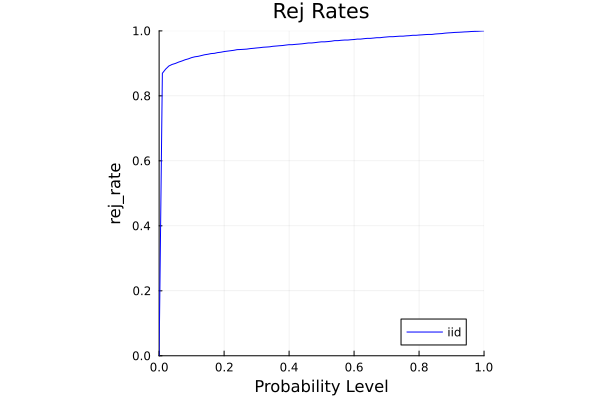

In [175]:
plot(θs,rej_rates[1,:], label="iid", xlabel="Probability Level", ylabel="rej_rate", title="Rej Rates", ratio = 1.0, xlims = (0,1), ylims = (0,1),color = "blue")